![Rick and My Job](https://raw.githubusercontent.com/homosociologicus/changellenge/master/images/rick_and_my_job.jpg)

# Упражнение 1: if elif else

Год является високосным, если:
- он делится на 4 и не делится на 100 или
- он делится на 400

Ввод: целое число >= 0

Вывод: `YES` если високосный, иначе `NO`

Пример:

`2020
YES`

In [6]:
A = int(input())
if A % 4 == 0 and A % 100 != 0 or A % 400 == 0:
    print('YES')
else:
    print('NO')

2020
YES


Выведите максимальное число из 3 заданных (не используйте функцию, это скучно)

Ввод: 3 целых числа

Вывод: максимальное число

Пример:

`1
2
3
3`

In [7]:
x = int(input())
y = int(input())
z = int(input())
if x >= y and x >= z:
    print(x)
elif y >= x and y >= z:
    print(y)
else:
    print(z)

1
2
3
3


Бонусное упражнение

![Coordinates](https://raw.githubusercontent.com/homosociologicus/changellenge/master/images/coordinates.png)

Ввод: 4 ненулевых числа: x1, y1, x2, y2

Вывод: `YES` если они в одной четверти, иначе `NO`

Пример:

`1
-3
2
2
NO`

Подсказка: попробуйте понять, что объединяет точки в одной четверти и как это можно записать

In [8]:
x1 = float(input())
y1 = float(input())
x2 = float(input())
y2 = float(input())
if x1 * x2 > 0 and y1 * y2 > 0:
    print('YES')
else:
    print('NO')

1
-3
2
3
NO


# Упражнение 2: циклы for, while

Сумма последовательности

Ввод: случайные ненулевые целые числа, 0 заканчивает последовательность

Вывод: число, равное сумме последовательности

Пример:

`1
2
3
4
5
6
7
8
9
10
0
55`

In [22]:
num = int(input())
sum_all = 0
while num != 0:  # not num
    sum_all += num
    num = int(input())
print(sum_all)

1
2
3
0
6


Старые добрые числа Фибоначчи. "Нулевое" число 0, первое 1, второе 1, далее 2, 3, 5, 8, 13, 21, ...

Ввод: номер числа Фибоначчи >= 1

Вывод: соответствующее число Фибоначчи

Пример:

`8
21`

In [11]:
n = int(input())
prev = 0
curr = 1
i = 1
while i < n:
    prev, curr = curr, prev + curr
    i += 1
print(curr)

100
354224848179261915075


Снова делимость. Для каждого числа последовательности выведите ближайшее снизу число, делящееся на 9. Если само число делится на 9, выведите его. Считать последовательность на вводе можно с помощью

`my_list = list(map(int, input().split()))`

и, кстати, `list` здесь не нужен (если знаете почему, то это здорово!)

Ввод: последовательность целых чисел, разделенных пробелами

Вывод: последовательность чисел, каждое из которых на новой строке

Пример:

`1 10 21 28 36 44
0
9
18
27
36
36`

In [16]:
for num in map(int, input().split()):
    print(num // 9 * 9)

1 10 21 28 36 44
0
9
18
27
36
36


# <center> Настала пора сразиться с реальной задачей </center>

![How to Code Fast](https://raw.githubusercontent.com/homosociologicus/changellenge/master/images/how_to_code_fast.jpg)

# <center> Основные концепты: Business Question и Business Value </center>
Представьте, что к вам приходит заказчик - decision maker, будь то департамент или отдельный человек,
и дает (если повезет, иногда ведь вообще ничего не дадут), хм, скажем культурно - некрасивые данные,
а потом говорит:

"Дайте какие-нибудь интересные инсайты насчет того, какую энергию нам стоит использовать.
Мы хотим презентовать себя на рынке как экологичную компанию"

Что делать? Как не довести ситуацию до второго главного вопроса: кто виноват?

### Источники данных: [Our World in Data: Energy](https://github.com/owid/energy-data) & [Our World in Data: CO₂ and Greenhouse Gas Emissions](https://github.com/owid/co2-data)
### Описание данных: [Energy](https://github.com/owid/energy-data/blob/master/owid-energy-codebook.csv) & [GHG](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv)

### Заметки
https://ourworldindata.org/energy

https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions
- ископаемое топливо - уголь, нефть и газ (coal, oil, and gas)
- PEC, primary energy consumption - первичное потребление энергии
- GHG, greenhouse gases - парниковые газы

## Импорты и настройка графиков

In [ ]:
# если у вас не установлены эти библиотеки, прогоните эту ячейку
!pip3 install --user --upgrade numpy pandas matplotlib seaborn tqdm

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# полезная библиотека для отслеживания прогресса с итераторами
from tqdm import tqdm


# векторные изображения более четко рендерятся
%config InlineBackend.figure_format = 'svg'

# никогда не используйте дефолтный стиль в plt, вы убьете себе глаза
plt.style.use('ggplot')

In [24]:
# как работает tqdm
for _ in tqdm(range(100000000)):
    _ = 100

100%|█████████████████████████████████| 100000000/100000000 [00:14<00:00, 6915505.93it/s]


## Данные
... ибо нам нужны аргументы для ответа бизнесу

In [25]:
energy_data = pd.read_csv('https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv')
ghg_data = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')

## EDA - Exploratory Data Analysis
... знай своего друга, своего врага и данные, которые в тебя бросили

Датасеты относительно ежедневных задач большие, давайте поглядим на них. Используйте методы `info(), head(), tail()` и, при необходимости, атрибут `columns`. Кстати, ввиду однородности столбцов с точки зрения naming conventions, есть смысл отсортировать названия столбцов перед выводом, если вдруг решите с ними ознакомиться

In [42]:
ghg_data.country.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Asia', 'Asia (excl. China & India)',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'EU-27', 'EU-28',
       'Ecuador', 'Egypt', 'El Salvado

In [36]:
ghg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25204 entries, 0 to 25203
Data columns (total 58 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             21948 non-null  object 
 1   country                              25204 non-null  object 
 2   year                                 25204 non-null  int64  
 3   co2                                  23949 non-null  float64
 4   consumption_co2                      3976 non-null   float64
 5   co2_growth_prct                      24931 non-null  float64
 6   co2_growth_abs                       23585 non-null  float64
 7   trade_co2                            3976 non-null   float64
 8   co2_per_capita                       23307 non-null  float64
 9   consumption_co2_per_capita           3976 non-null   float64
 10  share_global_co2                     23949 non-null  float64
 11  cumulative_co2              

In [34]:
sorted(ghg_data.columns)

['cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_growth_abs',
 'co2_growth_prct',
 'co2_per_capita',
 'co2_per_gdp',
 'co2_per_unit_energy',
 'coal_co2',
 'coal_co2_per_capita',
 'consumption_co2',
 'consumption_co2_per_capita',
 'consumption_co2_per_gdp',
 'country',
 'cumulative_cement_co2',
 'cumulative_co2',
 'cumulative_coal_co2',
 'cumulative_flaring_co2',
 'cumulative_gas_co2',
 'cumulative_oil_co2',
 'cumulative_other_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'flaring_co2',
 'flaring_co2_per_capita',
 'gas_co2',
 'gas_co2_per_capita',
 'gdp',
 'ghg_per_capita',
 'iso_code',
 'methane',
 'methane_per_capita',
 'nitrous_oxide',
 'nitrous_oxide_per_capita',
 'oil_co2',
 'oil_co2_per_capita',
 'other_co2_per_capita',
 'other_industry_co2',
 'population',
 'primary_energy_consumption',
 'share_global_cement_co2',
 'share_global_co2',
 'share_global_coal_co2',
 'share_global_cumulative_cement_co2',
 'share_global_cumulative_co2',
 'share_global_cumulative_coal_co2',
 'sha

- Давайте возьмем данные с 2000 по наст. время: приведем столбцы `year` в обоих датасетах к типу datetime и возьмем данные с 2000 года
- Давайте исследовать глобальные тренды: выберите данные для всего мира
- Есть ли в датасетах первичный ключ? Если да, то почему бы не использовать его вместо бессмысленного номера строки?

Вам помогут: `pd.to_datetime(), df.set_index()`

In [ ]:
'2021-12-31'

In [45]:
energy_data.loc[:, 'year'] = pd.to_datetime(energy_data['year'], format='%Y')
wrld_pec = energy_data[
    (energy_data['country'] == 'World')
    &
    (energy_data['year'].dt.year > 2000)
]

In [47]:
ghg_data.loc[:, 'year'] = pd.to_datetime(ghg_data['year'], format='%Y')
wrld_ghg = ghg_data[
    (ghg_data['country'] == 'World')
    &
    (ghg_data['year'].dt.year > 2000)
]

In [51]:
wrld_pec.set_index('year', drop=True, inplace=True)
wrld_ghg.set_index('year', drop=True, inplace=True)

### EDA для мировых данных
Теперь, когда мы выделили основные массивы, давайте посмотрим на то, что из себя представляют PEC и GHG. Проверьте на пропуски с помощью метода `isna()` и нужного агрегирующего метода. Видите столбец исключительно с пропусками? С большей частью? Есть ли в нем польза?

Орудие - метод `dropna()`

In [72]:
wrld_pec.dropna(axis=1, thresh=5, inplace=True)
wrld_ghg.dropna(axis=1, thresh=5, inplace=True)

C:\Program Files\Python310\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [69]:
wrld_ghg.shape[0]

20

In [71]:
wrld_ghg.isna().sum() / wrld_ghg.shape[0] * 100

iso_code                                0.0
country                                 0.0
co2                                     0.0
consumption_co2                         0.0
co2_growth_prct                         0.0
co2_growth_abs                          0.0
trade_co2                               0.0
co2_per_capita                          0.0
consumption_co2_per_capita              0.0
share_global_co2                        0.0
cumulative_co2                          0.0
share_global_cumulative_co2             0.0
co2_per_gdp                            80.0
consumption_co2_per_gdp                80.0
co2_per_unit_energy                     5.0
coal_co2                                0.0
cement_co2                              0.0
flaring_co2                             0.0
gas_co2                                 0.0
oil_co2                                 0.0
other_industry_co2                      0.0
cement_co2_per_capita                   0.0
coal_co2_per_capita             

In [73]:
len(wrld_pec.columns)

120

### Наблюдения
- раз
- два
- три


### Выбор данных
Много колонок => много переменных => много линий / других объектов на картинке => нечитаемые графики => никакой пользы
- Выберем наиболее важные фичи в PEC, которые отражают потребление и долю в PEC
- Аналогично выберем важные столбцы, касающиеся CO₂ and GHG (заметили, что во втором датасете нет столбцов share?)

Подсказка: благодаря авторам датасетов в названиях стоблцов видны подстроки, которые показывают принадлежность к смысловой группе

In [ ]:
import sqlachemy

engine = sqlachemy.create_engine('cred:pass')
conn_info = {'host': 'prod.shell.com', 'port': ''}
with lib.connect(**conn_info) as conn:
    cur = conn.cursor()
    cur.execute(
        """
        SELECT *
        FROM db.schema.table
        """
    )
    df = pd.DataFrame(cur.fetchall())
    df.to_pickle('path.pkl')

In [83]:
pec_cons_cols = [col for col in wrld_pec.columns
                 if 'consumption' in col]
pec_share_cols = [col for col in wrld_pec.columns
                  if 'share_energy' in col]
pec_change_cols = [col for col in wrld_pec.columns
                   if 'change_pct' in col]
pec_per_capita_cols = [col for col in wrld_pec.columns
                       if 'per_capita' in col]

ghg_cols = [
    'cement_co2',
    'co2',
    'coal_co2',
    'flaring_co2',
    'gas_co2',
    'methane',
    'nitrous_oxide',
    'oil_co2'
]
ghg_per_capita_cols = [col + '_per_capita'
                       for col in ghg_cols]
ghg_cols.extend(
    ['total_ghg', 'co2_growth_prct']
)

In [ ]:
df = pd.read_pickle()

In [78]:
sorted(wrld_ghg.columns)

['cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_growth_abs',
 'co2_growth_prct',
 'co2_per_capita',
 'co2_per_unit_energy',
 'coal_co2',
 'coal_co2_per_capita',
 'consumption_co2',
 'consumption_co2_per_capita',
 'country',
 'cumulative_cement_co2',
 'cumulative_co2',
 'cumulative_coal_co2',
 'cumulative_flaring_co2',
 'cumulative_gas_co2',
 'cumulative_oil_co2',
 'cumulative_other_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'flaring_co2',
 'flaring_co2_per_capita',
 'gas_co2',
 'gas_co2_per_capita',
 'ghg_per_capita',
 'iso_code',
 'methane',
 'methane_per_capita',
 'nitrous_oxide',
 'nitrous_oxide_per_capita',
 'oil_co2',
 'oil_co2_per_capita',
 'other_co2_per_capita',
 'other_industry_co2',
 'population',
 'primary_energy_consumption',
 'share_global_cement_co2',
 'share_global_co2',
 'share_global_coal_co2',
 'share_global_cumulative_cement_co2',
 'share_global_cumulative_co2',
 'share_global_cumulative_coal_co2',
 'share_global_cumulative_flaring_co2',
 'share_global_cu

In [86]:
pec = wrld_pec[pec_cons_cols + pec_share_cols + pec_change_cols + pec_per_capita_cols]
ghg = wrld_ghg[ghg_cols + ghg_per_capita_cols]

### Новые фичи
Видно, что в датасете PEC есть столбцы share, показывающие долю от всего PEC. Почему бы не создать такую же красоту в датасете GHG?

In [87]:
# только для главных столбцов, без per capita, total GHG and % growth
ghg_share_cols = []
for col in ghg.columns[:len(ghg_cols) - 2]:
    share_col = col + '_share_ghg'
    ghg.loc[:, share_col] = ghg[col] / ghg.total_ghg * 100
    ghg_share_cols.append(share_col)

C:\Program Files\Python310\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


# Аллилуйя, графики!

### График 1: World PEC, GHG, and CO₂
Давайте построим агрегаты для всего мира:

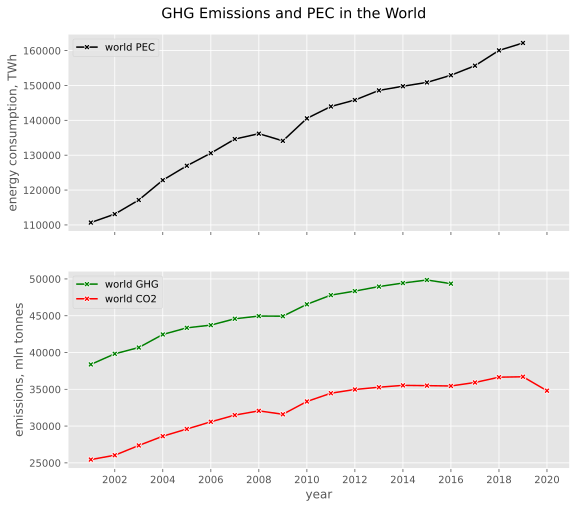

In [89]:
fig, (ax0, ax1) = plt.subplots(2, sharex=True, figsize=(9, 8))

# world primary energy consumption
sns.lineplot(x=pec.index,
             y=pec.primary_energy_consumption,
             ax=ax0,
             color='black',
             marker='X',
             label='world PEC')

# world ghg
sns.lineplot(x=ghg.index,
             y=ghg.total_ghg,
             ax=ax1,
             color='green',
             marker='X',
             label='world GHG')

# world co2
sns.lineplot(x=ghg.index,
             y=ghg.co2,
             ax=ax1,
             color='red',
             marker='X',
             label='world CO2')

# setting labels and legend
ax0.set_title('GHG Emissions and PEC in the World', x=0.45, y=1.05)
ax0.set_ylabel('energy consumption, TWh')
ax0.legend(loc='upper left')
ax1.set_ylabel('emissions, mln tonnes')
ax1.legend(loc='upper left')

# fig.savefig('graph_1.png', dpi=600)
plt.show()

### Наблюдения
- мысль 1
- мысль 2
- мысль 3

### График 2: World PEC by Source
Посмотрим на распределение потребления энергии в разбивке на источники:

In [ ]:
# по аналогии с предыдущим заданием настройте график

# только долевые столбцы
sns.lineplot(data=pec[pec_share_cols],
             palette='Paired',
             marker='o',
             dashes=None)

# не забудьте лейблы

# plt.savefig('graph_2.png', dpi=600)


Есть ли лучшие варианты показать распределение долей? Какие типы графиков подходят для этого?

### Наблюдения
- раз
- два
- три

### График 3: World GHG Emissions by Source

In [ ]:
# только долевые столбцы

# не забудьте лейблы


### Наблюдения
- уно
- дос
- трес

### График 4: Changes in World PEC Sources and CO₂
Посмотрим на изменения в PEC и выбросах CO₂:

In [ ]:
fig, ax = plt.subplots()

# как всегда, не забудьте лейблы


### Observations
- ан
- дё
- труа

### График 5: World PEC per Capita by Source

In [1]:
# очевидно, только столбцы <что-то> на человека

# подписи хотят, чтобы вы их сделали


### Наблюдения
- если что, можно писать не 3 вывода

### График 6: GHG Emissions per Capita

### Наблюдения
- умный вывод

### График 7: Correlation Matrix between PEC and GHG Emissions
Сложный процесс, поэтому разобьем по шагам:
1. Вертикально соединяем таблицы с ключами
2. Подсчитали корреляцию
3. Выбрали корреляцию между столбцами двух матриц

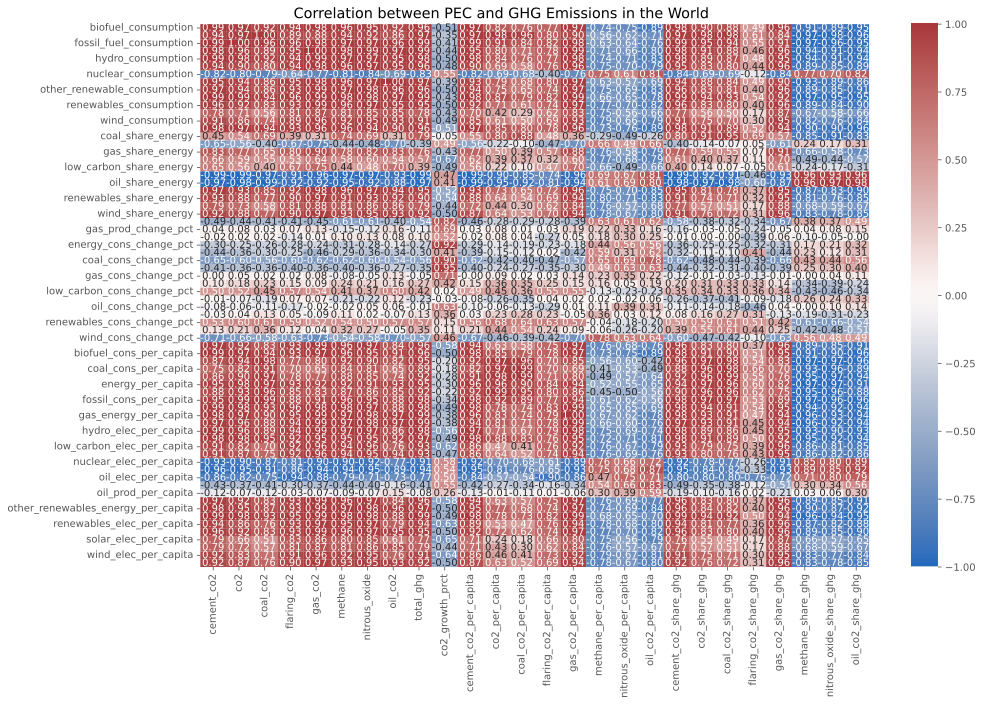

In [90]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(
    (
        pd.concat(
            [pec, ghg],
            axis=1,
            keys=['pec', 'ghg']
        )
        .corr()
        .loc['pec', 'ghg']
    ),
    vmin=-1,
    vmax=1,
    annot=True,
    fmt='.2f',
    cmap='vlag',
    ax=ax
)
plt.title('Correlation between PEC and GHG Emissions in the World', x=0.45)

plt.show()

## Observations
Тут может быть очень много наблюдений, но вспомните бизнес вопрос и выделите только самые важные

## Выводы и ответ на бизнес вопрос